In [1]:
import json
from datetime import datetime

In [2]:
def get_dict_from_json(file):
    with open(file) as json_file:
        return json.load(json_file)

coffee_data = get_dict_from_json('coffee_DT_lin_reg.json')
sleep_data = get_dict_from_json('sleep_DT_lin_reg.json')

In [3]:
coffee_data = get_dict_from_json('coffee_DT_lin_reg.json')
sleep_data = get_dict_from_json('sleep_DT_lin_reg.json')

In [4]:
def convert_nanos_timestamp_to_datetime(data):
    for key in ('maxEnd', 'minStart'):
        new_key = key + 'EndDT'
        old_key = key + 'TimeNs'
        data[new_key] = datetime.fromtimestamp(data[old_key] / 1e9)
    for point in data['point']:
        for key in ('start', 'end'):
            new_key = key + 'DT'
            old_key = key + 'TimeNanos'
            point[new_key] = datetime.fromtimestamp(point[old_key] / 1e9)

In [5]:
convert_nanos_timestamp_to_datetime(coffee_data)
convert_nanos_timestamp_to_datetime(sleep_data)

In [6]:
sleep_data

{'dataSourceId': 'raw:com.google.sleep.segment:407408718192:DT_sleep_example',
 'maxEndTimeNs': 1500412417000000000,
 'minStartTimeNs': 1606719878000000000,
 'point': [{'dataTypeName': 'com.google.sleep.segment',
   'startTimeNanos': 1500412417000000000,
   'endTimeNanos': 1500444817000000000,
   'value': [{'intVal': 5}],
   'startDT': datetime.datetime(2017, 7, 18, 23, 13, 37),
   'endDT': datetime.datetime(2017, 7, 19, 8, 13, 37)},
  {'dataTypeName': 'com.google.sleep.segment',
   'startTimeNanos': 1500497388000000000,
   'endTimeNanos': 1500522588000000000,
   'value': [{'intVal': 5}],
   'startDT': datetime.datetime(2017, 7, 19, 22, 49, 48),
   'endDT': datetime.datetime(2017, 7, 20, 5, 49, 48)},
  {'dataTypeName': 'com.google.sleep.segment',
   'startTimeNanos': 1500602616000000000,
   'endTimeNanos': 1500628356000000000,
   'value': [{'intVal': 5}],
   'startDT': datetime.datetime(2017, 7, 21, 4, 3, 36),
   'endDT': datetime.datetime(2017, 7, 21, 11, 12, 36)},
  {'dataTypeName': 

In [7]:
def convert_time_into_seconds_since_midnight(data):
    for point in data['point']:
        for key in ('start', 'end'):
            old_key = key + 'DT'
            new_key = key + 'seconds_since_midnight'
            midnight_sleep = point[old_key].replace(hour=0, minute=0, second=0, microsecond=0)
            point[new_key] = (point[old_key] - midnight_sleep).seconds

In [8]:
convert_time_into_seconds_since_midnight(coffee_data)
convert_time_into_seconds_since_midnight(sleep_data)

In [9]:
def modify_the_timestamps(data, hour):
    for point in data['point']:
        old_key = 'startseconds_since_midnight'
        new_key = 'seconds_since_midnight_modi'
        if point[old_key] < 60*60*hour:
            point[new_key] = point[old_key] + 60*60*24
        else:
            point[new_key] = point[old_key]

In [10]:
modify_the_timestamps(sleep_data, 10)
modify_the_timestamps(coffee_data, 4)

In [11]:
sec_since_mid_coffee_modi = [value['seconds_since_midnight_modi'] for value in coffee_data['point']]
sec_since_mid_sleep_modi = [value['seconds_since_midnight_modi'] for value in sleep_data['point']]

In [12]:
len(sec_since_mid_coffee_modi)

1231

In [13]:
len(sec_since_mid_sleep_modi)

1231

In [14]:
coffee_data

{'dataSourceId': 'raw:com.google.nutrition.segment:407408718192:DT_coffee_example',
 'maxEndTimeNs': 1606677873000000000,
 'minStartTimeNs': 1500386517000000000,
 'point': [{'dataTypeName': 'com.google.nutrition',
   'startTimeNanos': 1500386517000000000,
   'endTimeNanos': 1500386553000000000,
   'value': [{'mapVal': [{}]}, {'intVal': 5}, {'stringVal': 'coffee'}],
   'startDT': datetime.datetime(2017, 7, 18, 16, 1, 57),
   'endDT': datetime.datetime(2017, 7, 18, 16, 2, 33),
   'startseconds_since_midnight': 57717,
   'endseconds_since_midnight': 57753,
   'seconds_since_midnight_modi': 57717},
  {'dataTypeName': 'com.google.nutrition',
   'startTimeNanos': 1500462202000000000,
   'endTimeNanos': 1500462238000000000,
   'value': [{'mapVal': [{}]}, {'intVal': 5}, {'stringVal': 'coffee'}],
   'startDT': datetime.datetime(2017, 7, 19, 13, 3, 22),
   'endDT': datetime.datetime(2017, 7, 19, 13, 3, 58),
   'startseconds_since_midnight': 47002,
   'endseconds_since_midnight': 47038,
   'secon

In [15]:
sleep_data

{'dataSourceId': 'raw:com.google.sleep.segment:407408718192:DT_sleep_example',
 'maxEndTimeNs': 1500412417000000000,
 'minStartTimeNs': 1606719878000000000,
 'point': [{'dataTypeName': 'com.google.sleep.segment',
   'startTimeNanos': 1500412417000000000,
   'endTimeNanos': 1500444817000000000,
   'value': [{'intVal': 5}],
   'startDT': datetime.datetime(2017, 7, 18, 23, 13, 37),
   'endDT': datetime.datetime(2017, 7, 19, 8, 13, 37),
   'startseconds_since_midnight': 83617,
   'endseconds_since_midnight': 29617,
   'seconds_since_midnight_modi': 83617},
  {'dataTypeName': 'com.google.sleep.segment',
   'startTimeNanos': 1500497388000000000,
   'endTimeNanos': 1500522588000000000,
   'value': [{'intVal': 5}],
   'startDT': datetime.datetime(2017, 7, 19, 22, 49, 48),
   'endDT': datetime.datetime(2017, 7, 20, 5, 49, 48),
   'startseconds_since_midnight': 82188,
   'endseconds_since_midnight': 20988,
   'seconds_since_midnight_modi': 82188},
  {'dataTypeName': 'com.google.sleep.segment',
 

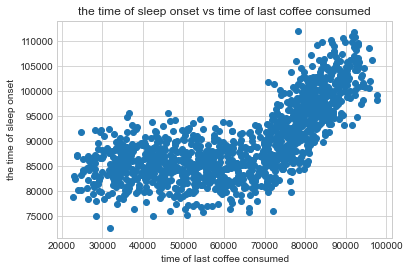

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

plt.scatter(sec_since_mid_coffee_modi, sec_since_mid_sleep_modi)
plt.title("the time of sleep onset vs time of last coffee consumed")
plt.xlabel("time of last coffee consumed")
plt.ylabel("the time of sleep onset");

In [17]:
from sklearn . model_selection import train_test_split
import numpy as np
X_test, X_train, y_test, y_train = train_test_split(np.array(sec_since_mid_coffee_modi).reshape(-1, 1), sec_since_mid_sleep_modi, test_size=0.2, random_state=0)


In [18]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X_train, y_train)

In [19]:
y_pred_all = model.predict(np.array(sec_since_mid_coffee_modi).reshape(-1, 1))

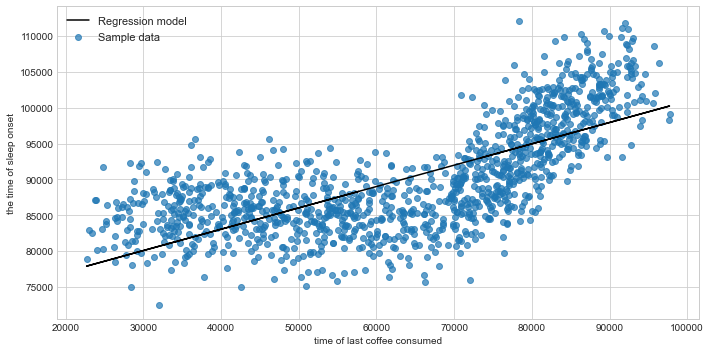

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sec_since_mid_coffee_modi, y_pred_all, color='k', label='Regression model')
ax.scatter(sec_since_mid_coffee_modi, sec_since_mid_sleep_modi, alpha=0.7, label='Sample data')
ax.set_ylabel('the time of sleep onset')
ax.set_xlabel('time of last coffee consumed')
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

In [21]:
coffee_date = datetime(2022, 1, 26, 20, 29, 6)

In [22]:
model.predict(np.array([(coffee_date - coffee_date.replace(hour=0, minute=0, second=0, microsecond=0)).seconds]).reshape(-1,1))

array([93094.01254422])

In [23]:
93094.01254422 / 60 / 60

25.859447928949997

In [24]:
(93094.01254422 / 60 / 60 - 25) * 60

51.56687573699983

In [25]:
((93094.01254422 / 60 / 60 - 25) * 60 - 51) * 60

34.01254421998999

# Polynomial Regression

In [94]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

In [95]:
pol_reg = linear_model.LinearRegression()
model = pol_reg.fit(X_poly, y_train)

In [96]:
y_pred_all = model.predict(poly_reg.transform(np.array(sec_since_mid_coffee_modi).reshape(-1, 1)))

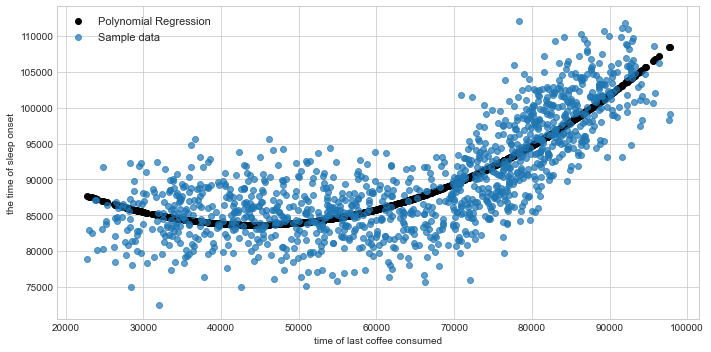

In [97]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.scatter(sec_since_mid_coffee_modi, y_pred_all, color='k', label='Polynomial Regression')
ax.scatter(sec_since_mid_coffee_modi, sec_since_mid_sleep_modi, alpha=0.7, label='Sample data')
ax.set_ylabel('the time of sleep onset')
ax.set_xlabel('time of last coffee consumed')
ax.legend(facecolor='white', fontsize=11)

fig.tight_layout()

In [98]:
import time
def predict(dt):
    X = poly_reg.transform(np.array([(dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).seconds]).reshape(-1,1))
    y = model.predict(X)
    return time.strftime("%H:%M:%S", time.gmtime(int(y)))

In [99]:
predict(datetime(2022, 1, 26, 20, 29, 6))

'01:19:56'

In [100]:
predict(datetime(2022, 1, 26, 15, 3, 45))

'23:28:43'

In [106]:
coefs = list(model.coef_)

In [108]:
coefs.reverse()

In [119]:
coefs[-1] = model.intercept_

In [121]:
coefs

[8.696601229562144e-06, -0.7711084077798611, 100766.03297275631]

[ 8.61870753e-06 -7.45213940e-01  1.01134656e+05]
-0.7758881347147162
-0.7758402604512702
0.15401171900383745
0.023719609590516985


Text(0.5, 1.0, 'Three-parameter model')

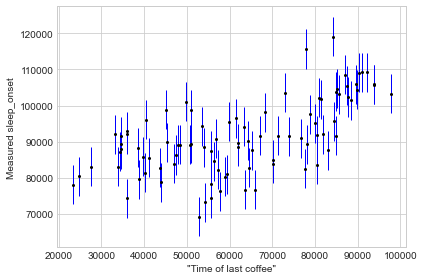

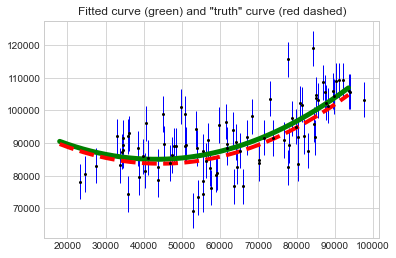

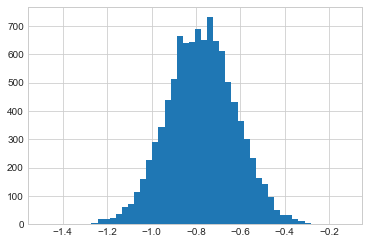

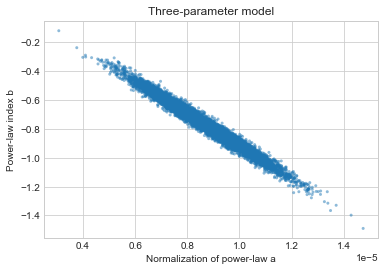

In [128]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 14 17:23:01 2021

@author: uhlenberg
"""

import pylab as plt
import numpy as np
from scipy import optimize


xMeas = sec_since_mid_coffee_modi[0:90]
yTrue = sec_since_mid_sleep_modi[0:90]
sError = 60*60*1.5
yMeas = yTrue + np.random.normal(scale=sError, size=np.size(yTrue))

plt.figure()
plt.errorbar(xMeas,yMeas,yerr=sError,lw=0,elinewidth=1,ecolor='b', fmt='ko',markersize=2)
plt.xlabel('"Time of last coffee"')
plt.ylabel('Measured sleep_onset')
plt.tight_layout()

#fit this data with our model. use scipy's "curve_fit", which is pretty robust (although does not include measurement error 
#in its fitting).  But MC will tell us what range of parameters come out under our chosen fitter.
# function to fit to this data
def f_decay(x,a,b,c):
    return (a * x**2) + (b * x) + c # from polynominal 2nd order

#We need to supply the fitter with an initial guess of the parameters. 
#Since we'll be using the same guess for our MC below, define this as a separate element. 
#also make the initial guess obviously "wrong" - i.e. assuming a quadratic when the underlying behavior is 1/t - to see what happens.

vGuess = [2.0,-2.0,2.0]# guess for a,b and c


vPars, aCova = optimize.curve_fit(f_decay, xMeas, yMeas, vGuess) # you get parameter and covariance
print (vPars)

plt.figure()
xFine = np.linspace(60*60*5,60*60*26,60*60*1) # from 5am till 2am in the morning in steps of 1hour
plt.errorbar(xMeas,yMeas,yerr=sError,lw=0,elinewidth=1,ecolor='b', fmt='ko',markersize=2)
plt.plot(xFine, f_decay(xFine,*vPars), 'g-', lw=5) # Fitted parameters
plt.plot(xFine, f_decay(xFine, *coefs), 'r--', lw=4) # Parameters used to generate data (coefficients and intercept)
plt.title('Fitted curve (green) and "truth" curve (red dashed)')

# Monte Carlo
nTrials =10000
aFitPars = np.array([])

for iTrial in range(nTrials):
    xTrial = np.random.uniform(60*60*5,60*60*26,size=np.size(xMeas))# same as above
    yGen =  f_decay(xTrial,*coefs) # Parameters used to generate data (coefficients and intercept)
    yTrial = yGen + np.random.normal(scale=sError,size=np.size(yGen))
    
    # We use a try/except clause to catch pathologies
    try:
        vTrial, aCova = optimize.curve_fit(f_decay,xTrial,yTrial,vGuess)
    except:
        dumdum=1
        continue  # This moves us to the next loop without stacking.
    
    #here follows the syntax for stacking the trial onto the running sample:
    if np.size(aFitPars) < 1:
        aFitPars=np.copy(vTrial)
    else:
        aFitPars = np.vstack(( aFitPars, vTrial ))
        
#size of the set of trials:  see how many runs were successfull      
np.shape(aFitPars)
print (np.median(aFitPars[:,1]))
print (np.mean(aFitPars[:,1]))
print (np.std(aFitPars[:,1]))# std:distance from mean
print(np.var(aFitPars[:,1])) # var: qudratic mean distance from mean --> error

# here you should generate your histogram
plt.figure()
plt.hist(aFitPars[:,1], bins=50)


#Notice also that our 1D distribution looks nice and gaussian. 
#But is the situation really this simple? Let's look at both power-law components together
plt.figure()
plt.scatter(aFitPars[:,0],aFitPars[:,1], alpha=0.5, s=9, edgecolor='none')
plt.xlabel('Normalization of power-law a')
plt.ylabel('Power-law index b')
plt.title('Three-parameter model')



In [ ]:
var(aFitPars[:,1])

In [127]:
len(aFitPars[:, 1])

10000

In [140]:
(vTrial - coefs)[:-1].mean()

-0.06434387139679575

In [137]:
coefs

[8.696601229562144e-06, -0.7711084077798611, 100766.03297275631]

# Monte Carlo

In [146]:
sec_since_mid_coffee_modi = np.array(sec_since_mid_coffee_modi)

In [143]:
12 * 60 * 60

43200

In [149]:
x_mid=sec_since_mid_coffee_modi[(sec_since_mid_coffee_modi >= 12 * 60 * 60) & (sec_since_mid_coffee_modi < 21 * 60 * 60)]# after 12am before 21pm


In [152]:
len(sec_since_mid_coffee_modi > 60 * 60 * 12)

1231

In [163]:
np.random.binomial(1, 0.5, 1)[0]

1

Probability of having a sleep_onset_before_12pm = 0.29 || Probability of a sleep_onset_after_12pm = 0.71


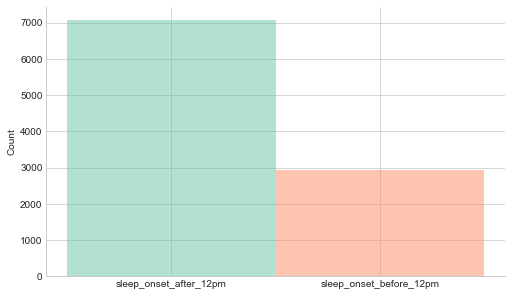

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#count data entries according to time
#count_early coffee
x_early = len(sec_since_mid_coffee_modi[sec_since_mid_coffee_modi < 12 * 60 * 60])# before oder at 12am
#value of x

#count_early coffee 
x_mid = len(sec_since_mid_coffee_modi[(sec_since_mid_coffee_modi >= 12 * 60 * 60) & (sec_since_mid_coffee_modi < 21 * 60 * 60)])# after 12am before 21pm
#value of x

#count_late coffee
x_late = len(sec_since_mid_coffee_modi[sec_since_mid_coffee_modi >= 21 * 60 * 60])

#calculate probability
p_early_coffee=x_early/len(sec_since_mid_coffee_modi)
p_mid_coffee=x_mid/len(sec_since_mid_coffee_modi)
p_late_coffee=x_late/len(sec_since_mid_coffee_modi)



def DT_sleep_model(consuming_hours, coffee_threshold, p_early_coffee, p_mid_coffee, p_late_coffee):
    ''' The model, i.e., how the different inputs interact to generate the output
    Model constants (not picked at random)
    :param consuming_hours: number of hours in a day you are consuming coffee (e.g. 5-19 Uhr)
    :param coffee_threshold: amount of coffee you need that will for sure result in a sleep_onset_after 12pm
    Model inputs (picked at random)
    :param p_early_coffee: probability of a last early_coffee
    :param p_mid_coffee: probability of a last mid_coffee
    :param p_late_coffee: probability of a last late_coffee 
    :return: The result of the model is either sleep_onset_before_12pm or sleep_onset_after_12pm.'''
    # taking 1 sample from the bernoulli distribution with a given probability of success.
    # a binomial distribution with just 1 trial is equivalent to the bernoulli distribution. that's done by setting size = 1
    if np.random.binomial(1, p_late_coffee, 1)[0]:
        # you're having a late coffee (after 9pm) it will result in a late sleep anyways
        return False
      # starting your day, and drink coffee
    day_start = True
    mid_coffee = np.random.binomial(1, p_mid_coffee, 1)[0]
    early_coffee = np.random.binomial(1, p_early_coffee, 1)[0]
    if mid_coffee:
        early_coffee=False
    while consuming_hours > 0 and coffee_threshold > 0:
        if early_coffee and day_start:
            coffee_threshold -= 2 #extra cup
            day_start=False
            consuming_hours-=4 #as 6 start --> until 12am when total is 10h consuming time
        
        if mid_coffee and consuming_hours % 2 == 0:
          # if you're having a mid_coffee, you get a cup of coffee every couple of hours
          coffee_threshold -= 2
        
        consuming_hours -= 1 # deducting hours
    return coffee_threshold == 0


def run_DT_simulations(runs=10000, consuming_hours=0, coffee_threshold=0, p_early_coffee=0.7, p_mid_coffee=0.35, p_late_coffee=0.05): 
    ''' Running 10,000 simulations (default) and plotting the results
    Only highlighting here the parameters not mentioned in the model function
    :param runs: number of times the model will run
    :return:
    '''
    results = []
    sim_count = 0
    while sim_count < runs:
        results.append(DT_sleep_model(consuming_hours, coffee_threshold, p_early_coffee, p_mid_coffee, p_late_coffee))
        sim_count += 1
  # making the output easier to interpret
    results = list(map(lambda x: 'sleep_onset_before_12pm' if x else 'sleep_onset_after_12pm', results))
    results_pd = pd.DataFrame(data=results)
    results_pd.columns = ['type']
    p_sleep_onset_before_12pm = round((results_pd[results_pd['type'] == 'sleep_onset_before_12pm'].count().values[0])/float(runs), 2)
    p_sleep_onset_after_12pm = round((results_pd[results_pd['type'] == 'sleep_onset_after_12pm'].count().values[0]) / float(runs), 2)
    print('Probability of having a sleep_onset_before_12pm = ' + str(p_sleep_onset_before_12pm) + ' || Probability of a sleep_onset_after_12pm = ' + str(p_sleep_onset_after_12pm))
    # plotting the output of all model runs
    fig, ax = plt.subplots(figsize=(7, 4), constrained_layout=True)
    # removing to and right border
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # setting the color palette
    sns.set_palette("Set2")
    sns.histplot(data=results_pd, x='type', hue='type', legend=False, linewidth=0)
    ax.xaxis.label.set_visible(False)
    plt.show()
    return(results)

    

results=run_DT_simulations(consuming_hours=10, coffee_threshold=6, p_early_coffee=p_early_coffee,
                           p_mid_coffee=p_mid_coffee, p_late_coffee=p_late_coffee)

In [187]:
results

['sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_before_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_before_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_before_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_before_12pm',
 'sleep_onset_before_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_before_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_before_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_after_12pm',
 'sleep_onset_before_

In [174]:
p_early_coffee

0.1917140536149472

In [175]:
p_mid_coffee

0.4516653127538586

In [176]:
p_late_coffee

0.3566206336311942

# Bayes regression model

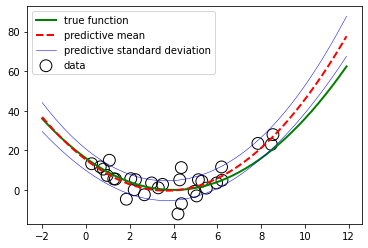

In [5]:
# Bayesian model selection demo for polynomial regression
# Page reference according to task description E11
# Based on a demo by Leo Schwinn
# Adapted: 2020, Lena Uhlenberg


import numpy as np
import matplotlib.pyplot as plt
import random



def polyBasis(x, deg):
    #Takes a vector and returns a polynomial basis matrix up to degree deg
    return(np.column_stack([x**deg for deg in range(deg+1)]))


def linregFitBayes(X, y, maxIter):
    #This learn a Bayes regression model by optimizing log marginal likelihood. 
    
    #we can start with some initial values for alpha and beta and then change them iteratively based on data
    alpha = 0.01
    beta =  1

    log_ml_old = - float('inf') #initialize log marginal likelihood
    Lhist = np.empty((maxIter, 1))

    #implement the log marginal likelihood logp(Y|X) and for a fixed number of iteration optimize it 
    #at each loop iteration compare new (L) and old (L_old) log marginal likelihood
    #if abs(L - L_old) < 1e-2 stop the optimization

    #Initialize some variables --> they stay the same over all iterations, therfore out of the loop
    N, M = X.shape # matrix dimension
    XX = np.dot(np.transpose(X), X) # covariance of X np.dot --> see https://numpy.org/doc/stable/reference/generated/numpy.dot.html
    Xy = np.dot(np.transpose(X), y) # covariance of y

    for i in range(maxIter): #iterativly estimate gradient decent
        # needed formulars
        # identity matrix A needed for log maginal likelihood and prediction later p. 3
        A = alpha*np.identity(M) + beta * XX  # formula learning parameters p. 3 formula np.identity --> see https://numpy.org/doc/stable/reference/generated/numpy.identity.html
        # you will need the inverse of matrix A, therefore one way of computing it is using the Cholesky decomposition
        cholA = np.transpose(np.linalg.cholesky(A)) # Cholesky decomposition formula to get the inverse of A see --> https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html
        Ui = np.linalg.inv(cholA) # formula is needed to calculate inverse of A
        A_inv = np.dot(Ui, np.transpose(Ui)) # formula for A inverted p.3

        mn = beta * np.dot(A_inv, Xy) # formula p.3 fill in missing parameter
        
        #intermediate variable to use to compute the Expectation Em        
        t1 = sum((y - np.dot(X, mn)) * (y - np.dot(X, mn)))# inner term of formular p.3
        t2 = np.dot(np.transpose(mn), mn) # second term of formular p. 3 --> all the variables are devided by 2 in the formular --> devide them once at the end

        Emn = beta * t1 - alpha * t2 # merge the two intermediate variables to one formular see p.3
        # log marginal likelihood
        log_det = sum(np.log(np.diag(A)))# norm of the matrix p.3
        
        #maximizing initial formula p.3
        log_ml = float(M) * np.log(alpha) + float(N) * np.log(beta) - log_det \
                 - Emn - float(N) * np.log(2 * np.pi)
        log_ml = log_ml / 2 #--> as stated earlier here we divide everything by 2 insead of every term seperately

        # update paramerters p.4
        gamma = M - alpha * np.trace(A_inv)# formula p.4
        alpha = gamma/ t2
        beta = (N - gamma) / t1

        Lhist[i] = log_ml# keep track of log_ml to see convergence
        if abs(log_ml_old - log_ml) < 1e-2: # run until convergence
            break
        else:
            log_ml_old = log_ml

    # dict of our model 
    model = {'wN': mn, 'VN': A_inv, 'beta': beta, 'alpha': alpha, 'gamma': gamma}

    return model, log_ml_old, Lhist

def linregPredictBayes(model, X):
    #This accepts a model of the form produced by linregFitBayes
    #and an array of X to form posterior predictions p(y∗|x∗,y,X)
    yhat = np.dot(X, model["wN"])# mean estimate (multiplying the model with the imput we got)
    # formula p.4 to predict uncertainty estimate
    sigma2hat = (1. / model["beta"]) + np.diag(np.dot(np.dot(X, model["VN"]), np.transpose(X))) 
   
    return yhat, sigma2hat


# Bayesian model selection demo for polynomial regression
# generate data and plots here

# generate data and plots here
np.random.seed(2) #to generate the same random data in diffrenet runs

deg = 2 #degree of polynomial
n = 30 #number of data points
# training x1d and test data plotvals1d
x1d = np.random.uniform(0, 10, n) #input points
e = np.random.normal(0, 1, n) #noise 
ytrain = (x1d - 4.0)**2 + 5.0*e #observed y
plotvals1d = np.arange(-2.0, 12, .1) #grid for plotting/testing
trueOutput = (plotvals1d - 4.0) ** 2 #true function --> same as the one without the noise


X = polyBasis(x1d, deg) #Polynomial basis
[mod, logev, hist] = linregFitBayes(X, ytrain, maxIter=20) #Fit the model

Xtest = polyBasis(plotvals1d, deg) #Grid to test our prediction on
[mu, sig2] = linregPredictBayes(mod,Xtest)# what do we get here?
sig2 = np.sqrt(sig2)

#plots
plt.plot()
plt.scatter(x1d, ytrain, s=140, facecolors='none', edgecolors='k', label='data')
lower = mu-sig2
upper = mu+sig2
plt.plot(plotvals1d, trueOutput, 'g', linewidth=2, label='true function')
plt.plot(plotvals1d, mu, 'r--', linewidth=2, label='predictive mean')# which of the parameter is indicating the predictive mean?
plt.plot(plotvals1d, lower, 'b-', linewidth=0.5)
plt.plot(plotvals1d, upper, 'b-', linewidth=0.5, label='predictive standard deviation')
plt.legend()
plt.show()